## Customized gymnasium environment: `smart-city`

In [1]:
import gymnasium
import matplotlib.pyplot as plt
# importing mobile_env automatically registers the predefined scenarios in Gym

import mobile_env
# predefined small scenarios
from mobile_env.scenarios.smart_city import MComSmartCity

In [2]:
# create a small mobile environment for a single, centralized control agent
# pass rgb_array as render mode so the env can be rendered inside the notebook
env = gymnasium.make("mobile-smart_city-central-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 3 users, 25 sensors and 1 cells.


c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.NUM_USERS to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.NUM_USERS` for environment variables or `env.get_wrapper_attr('NUM_USERS')` that will search the reminding wrappers.
  logger.warn(
c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.NUM_SENSORS to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.NUM_SENSORS` for environment variables or `env.get_wrapper_attr('NUM_SENSORS')` that will search the reminding wrappers.
  logger.warn(
c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.NUM_STATIONS to get variables from other wrappers is deprecated and will be removed in v1.0, to get th

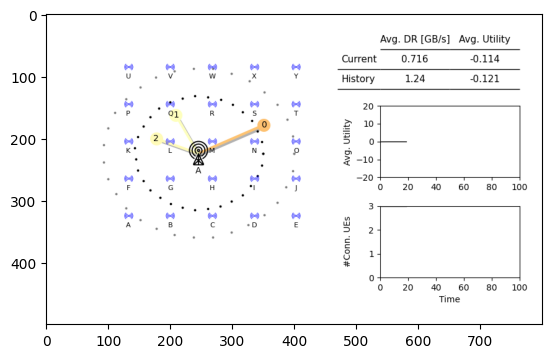

In [5]:
from IPython import display

# run the simulation for 10 time steps
done = False
obs, info = env.reset()
for _ in range(20):
    # here, use random dummy actions by sampling from the action space
    dummy_action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(dummy_action)

    # render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.render_queues to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_queues` for environment variables or `env.get_wrapper_attr('render_queues')` that will search the reminding wrappers.
  logger.warn(


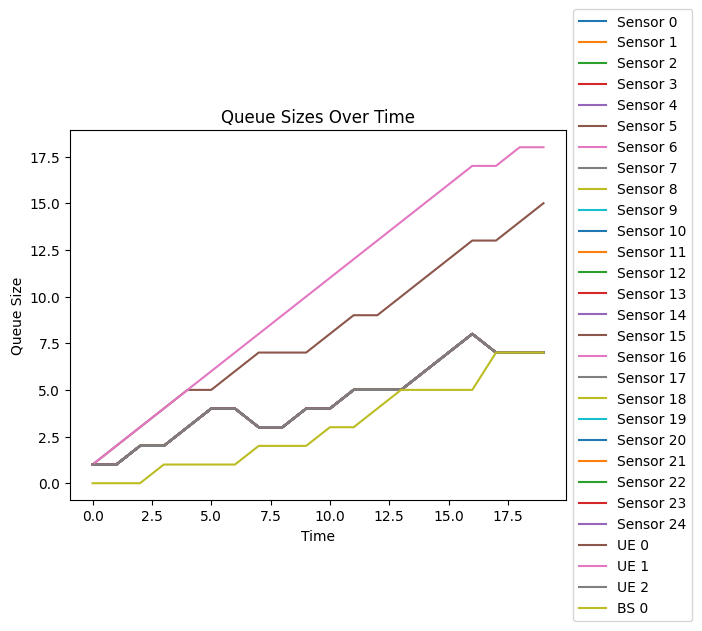

In [4]:
env.render_queues()